# Sistema de Información de Eventos de Violencia del Conflicto Armado SIEVCAC - Víctimas DF Desaparición Forzada

Victimas para el tipo de violencia DF Desaparición Forzada, con corte al 30 - 09 - 2024

## instalaciones 

In [1]:
!pip install requests pandas



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install folium



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install plotly ipywidgets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install dash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Generar el daataframe

In [3]:
import requests
import pandas as pd
from time import sleep

base_url = "https://www.datos.gov.co/resource/c59y-p4sz.json"
limit = 50000
offset = 0
total_rows = 200000
data = []
max_retries = 3

while offset < total_rows:
    params = {
       # 'filtro': 'sjsj',  # Clave corregida
        '$limit': limit,
        '$offset': offset
    }

    print(f"Descargando registros desde {offset} hasta {offset + limit}...")

    for attempt in range(max_retries):
        try:
            response = requests.get(base_url, params=params, timeout=30)  # Timeout extendido a 30 segundos
            if response.status_code == 200:
                batch = response.json()
                break
            else:
                print(f"Error {response.status_code} en intento {attempt + 1}, reintentando en 5 segundos...")
                sleep(5)
        except requests.exceptions.Timeout:
            print(f"Timeout en intento {attempt + 1}, reintentando en 5 segundos...")
            sleep(5)
        except requests.exceptions.RequestException as e:
            print(f"Error en intento {attempt + 1}: {e}")
            sleep(5)
    else:
        print("Error persistente, abortando descarga.")
        break

    if not batch:
        print("No hay más datos, finalizando descarga.")
        break

    data.extend(batch)

    if len(batch) < limit:
        print("Último lote recibido, terminando.")
        break

    offset += limit

    sleep(2)  # Espera entre lotes para no saturar el servidor

df = pd.DataFrame(data)
print(f"\nDataFrame creado exitosamente con {len(df)} filas.")
print(df.head())

df.to_csv("datos_completos.csv", index=False)
print("\nDatos guardados en 'datos_completos.csv'.")

Descargando registros desde 0 hasta 50000...
Descargando registros desde 50000 hasta 100000...
Último lote recibido, terminando.

DataFrame creado exitosamente con 80901 filas.
  id_caso c_digo_dane_de_municipio  municipio  departamento   a_o mes d_a  \
0  100265                    25368  JERUSALEN  CUNDINAMARCA  1991   5  25   
1  100282                    25386    LA MESA  CUNDINAMARCA  2004  12   2   
2  101616                    25885     YACOPI  CUNDINAMARCA  1993   3   9   
3  101616                    25885     YACOPI  CUNDINAMARCA  1993   3   9   
4  102204                    27099     BOJAYA         CHOCO  1997   6   8   

  id_persona    sexo          ocupaci_n calidad_de_la_v_ctima_o_la  \
0      72226  HOMBRE  PERSONAL DE SALUD                      CIVIL   
1     129425  HOMBRE           EMPLEADO                      CIVIL   
2      71898  HOMBRE          CAMPESINO                      CIVIL   
3      71900  HOMBRE          CAMPESINO                      CIVIL   
4      808

### informacion del dataframe

In [4]:
df.columns

Index(['id_caso', 'c_digo_dane_de_municipio', 'municipio', 'departamento',
       'a_o', 'mes', 'd_a', 'id_persona', 'sexo', 'ocupaci_n',
       'calidad_de_la_v_ctima_o_la', 'tipo_de_poblaci_n_vulnerable',
       'situaci_n_actual_de_la_v', 'latitud_longitud',
       'fuente_de_informaci_n_de', 'edad', 'militante_pol_tico',
       'fuerza_o_grupo_armado', 'descripci_n_fuerza_o_grupo', 'etnia'],
      dtype='object')

In [4]:
df.head(5)

,id_caso,c_digo_dane_de_municipio,municipio,departamento,a_o,mes,d_a,id_persona,sexo,ocupaci_n,calidad_de_la_v_ctima_o_la,tipo_de_poblaci_n_vulnerable,situaci_n_actual_de_la_v,latitud_longitud,fuente_de_informaci_n_de,edad,militante_pol_tico,fuerza_o_grupo_armado,descripci_n_fuerza_o_grupo,etnia
0,100265,25368,JERUSALEN,CUNDINAMARCA,1991,5,25,72226,HOMBRE,PERSONAL DE SALUD,CIVIL,MAESTRO O EDUCADOR,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.68915853...",NaN,NaN,NaN,NaN,NaN,NaN
1,100282,25386,LA MESA,CUNDINAMARCA,2004,12,2,129425,HOMBRE,EMPLEADO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.47321717...",ENTIDAD PÚBLICA,ADULTEZ (29-59 AÑOS),NaN,NaN,NaN,NaN
2,101616,25885,YACOPI,CUNDINAMARCA,1993,3,9,71898,HOMBRE,CAMPESINO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.33802435...",FAMILIARES O COMUNIDAD,NaN,NaN,NaN,NaN,NaN
3,101616,25885,YACOPI,CUNDINAMARCA,1993,3,9,71900,HOMBRE,CAMPESINO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.33802435...",FAMILIARES O COMUNIDAD,ADOLESCENCIA (12-17 AÑOS),NaN,NaN,NaN,NaN
4,102204,27099,BOJAYA,CHOCO,1997,6,8,80824,HOMBRE,OBRERO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-77.09933025...",ENTIDAD PÚBLICA,NaN,UNIÓN PATRIÓTICA,NaN,NaN,NaN


In [5]:
valores_unicos = df['situaci_n_actual_de_la_v'].unique()
print(valores_unicos)


['APARECIÓ MUERTO' 'DESAPARECIDO'
 'SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN' 'APARECIÓ VIVO'
 'MUERTO EN CAUTIVERIO' 'LIBERADO' 'CONTINÚA SECUESTRADO']


## situación Victima

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


conteo_opciones = df['situaci_n_actual_de_la_v'].value_counts()
print(conteo_opciones)


situaci_n_actual_de_la_v
DESAPARECIDO                                  58987
SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN    11740
APARECIÓ MUERTO                                8380
APARECIÓ VIVO                                  1789
MUERTO EN CAUTIVERIO                              2
LIBERADO                                          2
CONTINÚA SECUESTRADO                              1
Name: count, dtype: int64


In [12]:
conteo_opciones

situaci_n_actual_de_la_v
DESAPARECIDO                                  58987
SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN    11740
APARECIÓ MUERTO                                8380
APARECIÓ VIVO                                  1789
MUERTO EN CAUTIVERIO                              2
LIBERADO                                          2
CONTINÚA SECUESTRADO                              1
Name: count, dtype: int64

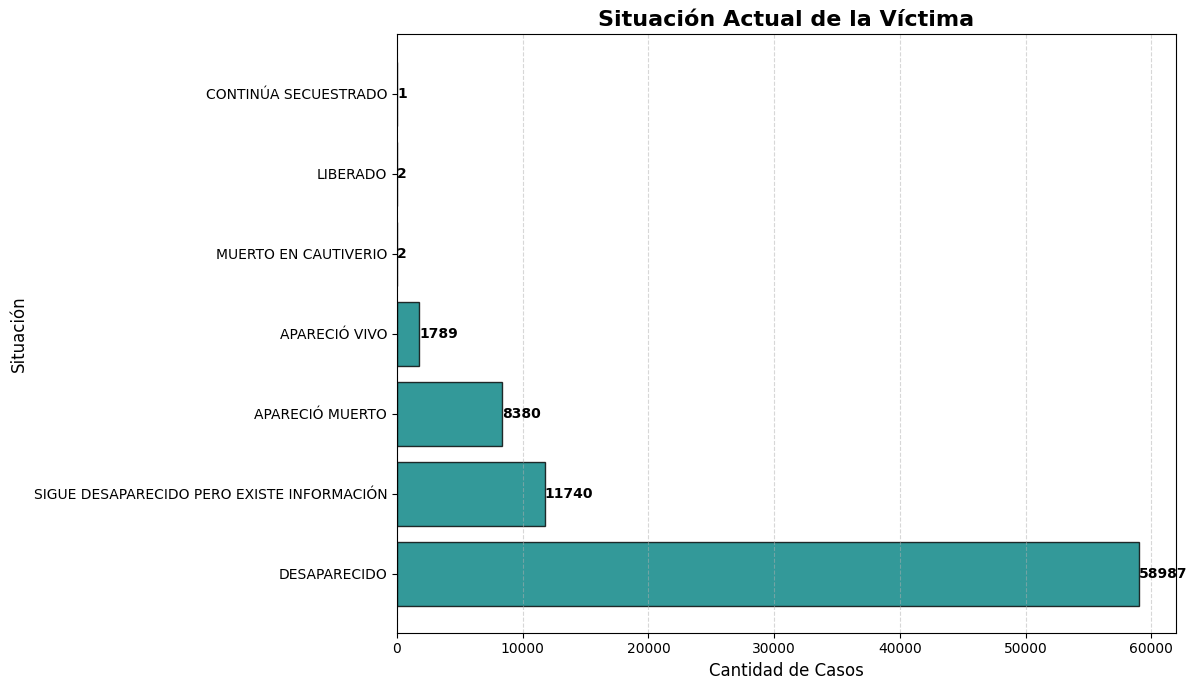

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está cargado como df
conteo_opciones = df['situaci_n_actual_de_la_v'].value_counts()

# Gráfica
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(conteo_opciones.index, conteo_opciones.values, color='teal', edgecolor='black', alpha=0.8)

# Títulos y etiquetas
ax.set_title('Situación Actual de la Víctima', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Casos', fontsize=12)
ax.set_ylabel('Situación', fontsize=12)

# Mostrar valores al lado de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{int(width)}', va='center', fontsize=10, color='black', fontweight='bold')

# Estilo general
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


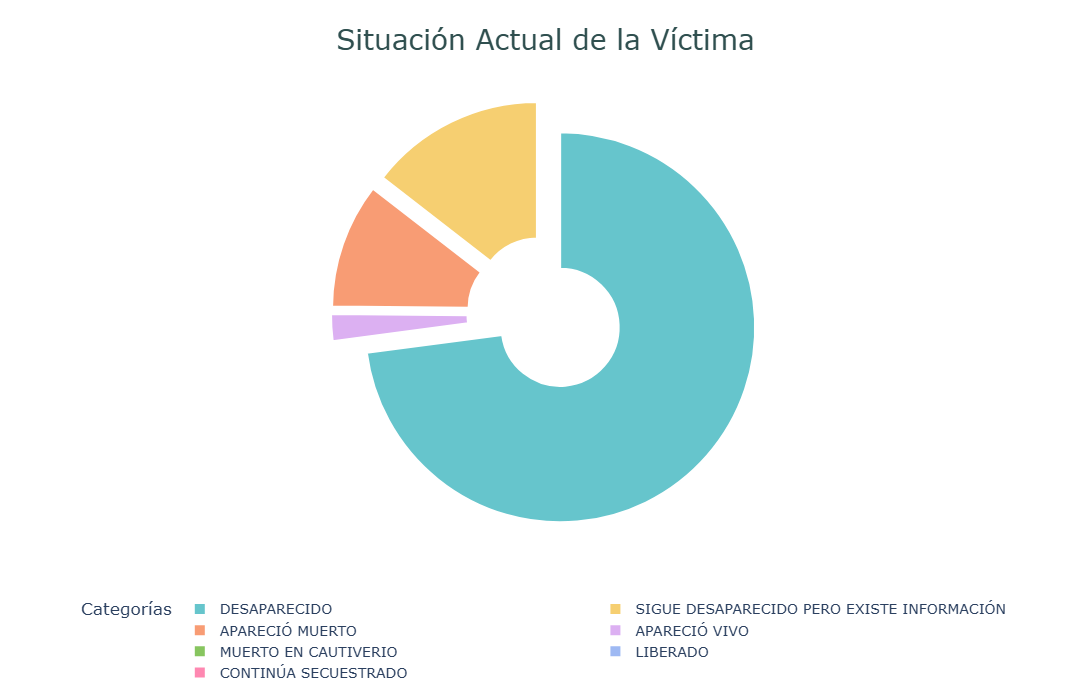

In [7]:
import plotly.express as px

fig = px.pie(
    names=conteo_opciones.index,
    values=conteo_opciones.values,
    title='Situación Actual de la Víctima',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.3
)

fig.update_traces(
    textinfo='none',  # no mostrar texto dentro de la torta
    pull=[0.1]*len(conteo_opciones),
    marker=dict(line=dict(color='white', width=2)),
    hovertemplate='%{label}: %{value} casos<br>%{percent}'  # porcentaje solo en hover
)

fig.update_layout(
    width=700,
    height=700,
    title=dict(text='Situación Actual de la Víctima', font=dict(size=28, color='darkslategray'), x=0.5),
    legend_title_text='Categorías',
    legend=dict(
        orientation='h',
        y=-0.15,
        x=0.5,
        xanchor='center',
        font=dict(size=14)
    ),
    margin=dict(t=100, b=100)
)

fig.show()
fig.write_html("situacion_victimas.html")


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está cargado como df
por_anio = df['a_o'].value_counts()
por_anio


a_o
2002    7954
2001    6463
2000    5984
2003    5914
2004    4791
        ... 
1967       2
1971       2
1959       2
1957       2
1956       1
Name: count, Length: 74, dtype: int64

In [5]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Suponiendo que df ya está definido
df['a_o'] = pd.to_numeric(df['a_o'], errors='coerce')
df_filtrado = df[(df['a_o'].notna()) & (df['a_o'] >= 1951)]
por_anio = df_filtrado['a_o'].value_counts().sort_index()
por_anio_df = por_anio.reset_index()
por_anio_df.columns = ['a_o', 'cantidad']

app = Dash(__name__)

fig = px.bar(por_anio_df, x='a_o', y='cantidad',
             title='Cantidad por Año desde 1951',
             labels={'a_o': 'Año', 'cantidad': 'Cantidad'})

# Desactivar el range slider para que no aparezca el gráfico pequeño
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))

app.layout = html.Div([
    dcc.Graph(id='bar-chart', figure=fig)
])

@app.callback(
    Output('bar-chart', 'figure'),
    Input('bar-chart', 'relayoutData')
)
def update_chart(relayoutData):
    if relayoutData is None:
        return fig

    if 'xaxis.range[0]' in relayoutData and 'xaxis.range[1]' in relayoutData:
        x_start = relayoutData['xaxis.range[0]']
        x_end = relayoutData['xaxis.range[1]']

        filtered = por_anio_df[(por_anio_df['a_o'] >= x_start) & (por_anio_df['a_o'] <= x_end)]

        if filtered.empty:
            return fig

        new_fig = px.bar(filtered, x='a_o', y='cantidad',
                         title=f'Cantidad por Año desde {int(x_start)} hasta {int(x_end)}',
                         labels={'a_o': 'Año', 'cantidad': 'Cantidad'})

        # Aquí también desactivar el rangeslider para no mostrar el gráfico pequeño
        new_fig.update_layout(
            xaxis=dict(range=[x_start, x_end], rangeslider=dict(visible=False)),
            yaxis=dict(range=[0, filtered['cantidad'].max() * 1.1])
        )
        return new_fig

    return fig

if __name__ == '__main__':
    app.run(debug=True)
fig.write_html("cantidad_por_año.html")

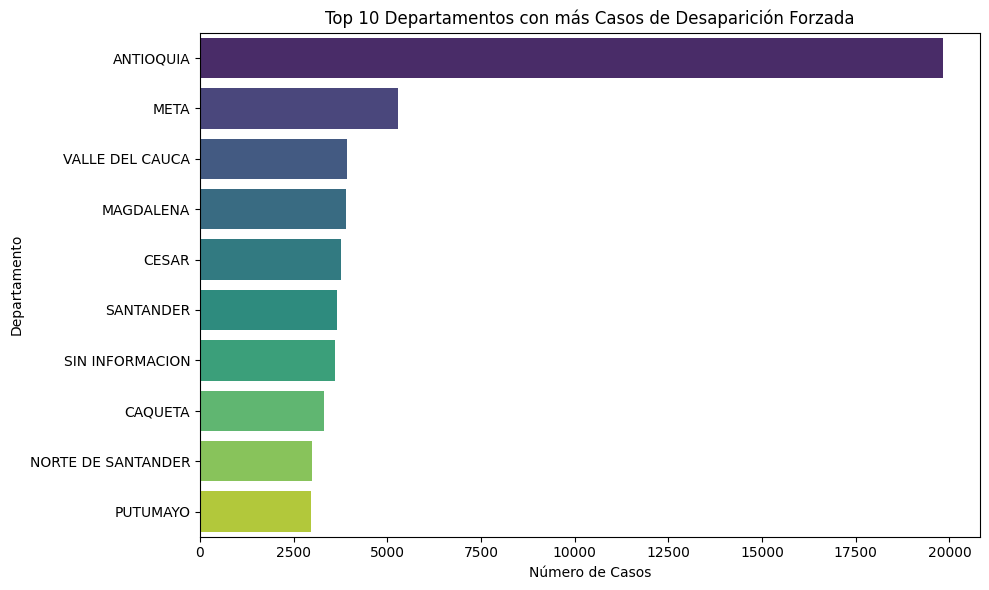

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df
top_departamentos = df['departamento'].value_counts().head(10)
top_departamentos

plt.figure(figsize=(10,6))
sns.barplot(x=top_departamentos.values, y=top_departamentos.index, 
            palette='viridis', hue=top_departamentos.index, legend=False)
plt.title('Top 10 Departamentos con más Casos de Desaparición Forzada')
plt.xlabel('Número de Casos')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()


In [22]:
top_departamentos

departamento
ANTIOQUIA             19824
META                   5289
VALLE DEL CAUCA        3937
MAGDALENA              3906
CESAR                  3762
SANTANDER              3669
SIN INFORMACION        3594
CAQUETA                3306
NORTE DE SANTANDER     2995
PUTUMAYO               2960
Name: count, dtype: int64

In [29]:
valores_unicos = df['fuerza_o_grupo_armado'].unique()
print(valores_unicos)


[nan 'GRUPO PARAMILITAR' 'AGENTE DEL ESTADO' 'GUERRILLA'
 'AGENTE EXTRANJERO' 'GRUPO POSDESMOVILIZACIÓN']


In [ ]:
coordenadas = df['latitud_longitud']
print(coordenadas)

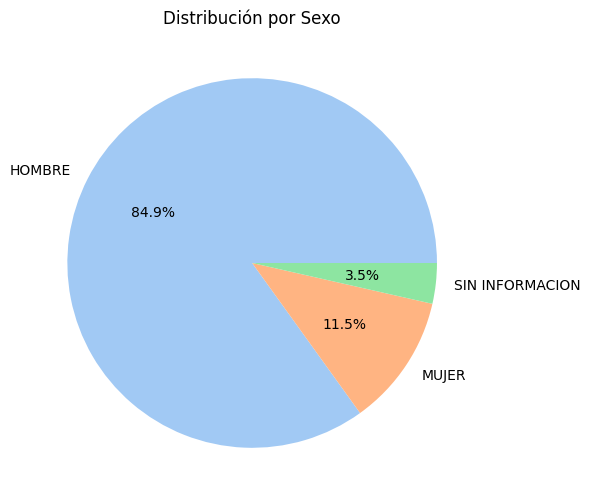

In [23]:
sexo_counts = df['sexo'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución por Sexo')
plt.show()


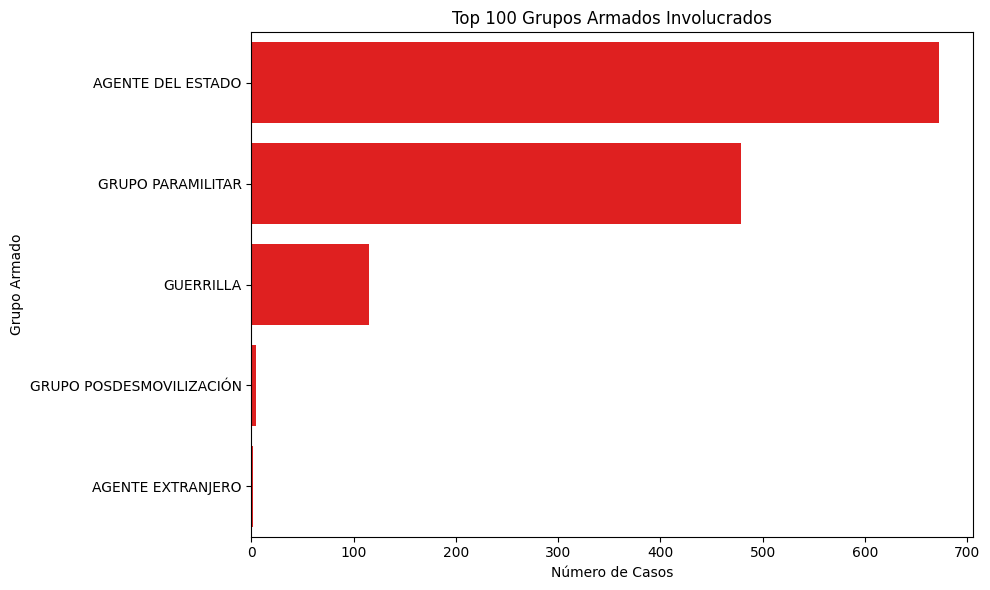

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_grupos.values, y=top_grupos.index, color='red')
plt.title('Top 100 Grupos Armados Involucrados')
plt.xlabel('Número de Casos')
plt.ylabel('Grupo Armado')
plt.tight_layout()
plt.show()


In [10]:
df.columns

Index(['id_caso', 'c_digo_dane_de_municipio', 'municipio', 'departamento',
       'a_o', 'mes', 'd_a', 'id_persona', 'sexo', 'ocupaci_n',
       'calidad_de_la_v_ctima_o_la', 'tipo_de_poblaci_n_vulnerable',
       'situaci_n_actual_de_la_v', 'latitud_longitud',
       'fuente_de_informaci_n_de', 'edad', 'militante_pol_tico',
       'fuerza_o_grupo_armado', 'descripci_n_fuerza_o_grupo', 'etnia'],
      dtype='object')

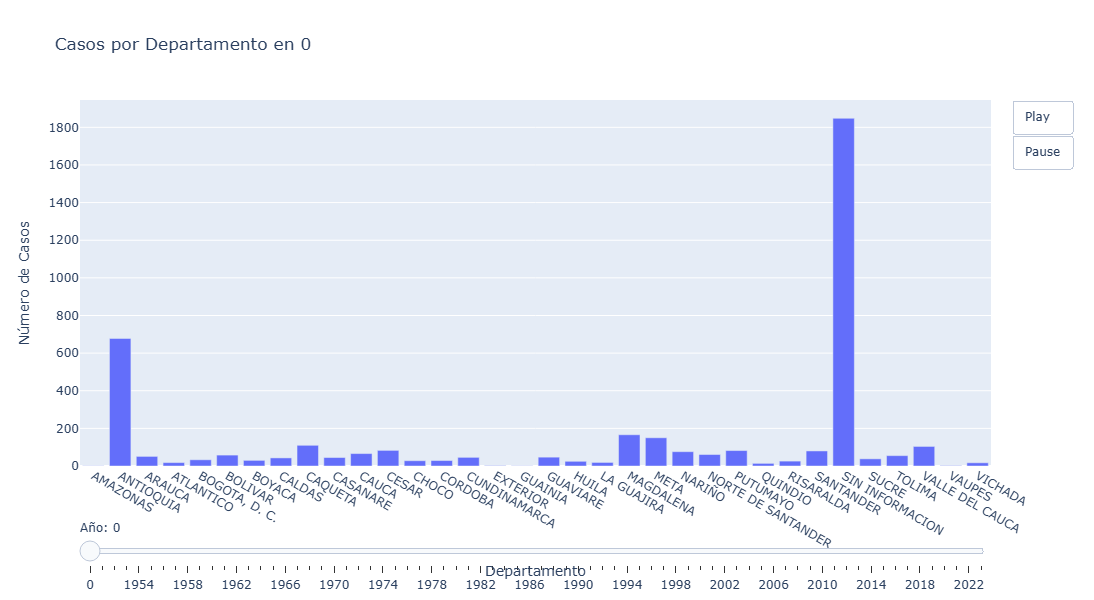

In [27]:
import pandas as pd
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Contar casos por año y departamento para usar en el gráfico
df_counts = df.groupby(['a_o', 'departamento']).size().reset_index(name='casos')

# Ordenar años para el slider
años = sorted(df['a_o'].unique())

# Crear la figura inicial con datos del primer año
fig = px.bar(df_counts[df_counts['a_o'] == años[0]], 
             x='departamento', y='casos',
             title=f'Casos por Departamento en {años[0]}',
             labels={'casos':'Número de Casos', 'departamento':'Departamento'},
             height=600)

# Crear frames para animación (cada frame es un año)
frames = []
for año in años:
    df_año = df_counts[df_counts['a_o'] == año]
    frames.append(dict(
        data=[dict(type='bar', x=df_año['departamento'], y=df_año['casos'])],
        name=str(año)
    ))

fig.frames = frames

# Configurar el slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Año: "},
    pad={"t": 50},
    steps=[dict(method='animate',
                args=[[str(año)],
                      {"mode": "immediate",
                       "frame": {"duration": 500, "redraw": True},
                       "transition": {"duration": 0}}],
                label=str(año)) for año in años]
)]

# Configurar layout con botones de play/pause y slider
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=1,
        x=1.1,
        xanchor='right',
        yanchor='top',
        pad=dict(t=0, r=10),
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None, {"frame": {"duration": 500, "redraw": True},
                                   "fromcurrent": True, "transition": {"duration": 0}}]),
                 dict(label='Pause',
                      method='animate',
                      args=[[None], {"frame": {"duration": 0, "redraw": False},
                                     "mode": "immediate",
                                     "transition": {"duration": 0}}])]
    )],
    sliders=sliders
)

fig.show()
fig.write_html("casos_desapariciones_por_departamento.html")


In [12]:
df.columns


Index(['id_caso', 'c_digo_dane_de_municipio', 'municipio', 'departamento',
       'a_o', 'mes', 'd_a', 'id_persona', 'sexo', 'ocupaci_n',
       'calidad_de_la_v_ctima_o_la', 'tipo_de_poblaci_n_vulnerable',
       'situaci_n_actual_de_la_v', 'latitud_longitud',
       'fuente_de_informaci_n_de', 'edad', 'militante_pol_tico',
       'fuerza_o_grupo_armado', 'descripci_n_fuerza_o_grupo', 'etnia'],
      dtype='object')

In [45]:
df

,id_caso,c_digo_dane_de_municipio,municipio,departamento,a_o,mes,d_a,id_persona,sexo,ocupaci_n,calidad_de_la_v_ctima_o_la,tipo_de_poblaci_n_vulnerable,situaci_n_actual_de_la_v,latitud_longitud,fuente_de_informaci_n_de,edad,militante_pol_tico,fuerza_o_grupo_armado,descripci_n_fuerza_o_grupo,etnia
0,100265,25368,JERUSALEN,CUNDINAMARCA,1991,5,25,72226,HOMBRE,PERSONAL DE SALUD,CIVIL,MAESTRO O EDUCADOR,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.68915853...",NaN,NaN,NaN,NAN,NaN,NaN
1,100282,25386,LA MESA,CUNDINAMARCA,2004,12,2,129425,HOMBRE,EMPLEADO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.47321717...",ENTIDAD PÚBLICA,ADULTEZ (29-59 AÑOS),NaN,NAN,NaN,NaN
2,101616,25885,YACOPI,CUNDINAMARCA,1993,3,9,71898,HOMBRE,CAMPESINO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.33802435...",FAMILIARES O COMUNIDAD,NaN,NaN,NAN,NaN,NaN
3,101616,25885,YACOPI,CUNDINAMARCA,1993,3,9,71900,HOMBRE,CAMPESINO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-74.33802435...",FAMILIARES O COMUNIDAD,ADOLESCENCIA (12-17 AÑOS),NaN,NAN,NaN,NaN
4,102204,27099,BOJAYA,CHOCO,1997,6,8,80824,HOMBRE,OBRERO,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-77.09933025...",ENTIDAD PÚBLICA,NaN,UNIÓN PATRIÓTICA,NAN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80896,98477,23580,PUERTO LIBERTADOR,CORDOBA,1990,3,16,136603,HOMBRE,MINERO,CIVIL,NaN,DESAPARECIDO,"{'type': 'Point', 'coordinates': [-75.77123224...",FAMILIARES O COMUNIDAD,JUVENTUD (18-28 AÑOS),NaN,NAN,NaN,NaN
80897,98981,23807,TIERRALTA,CORDOBA,2002,2,25,162681,HOMBRE,SIN INFORMACIÓN,CIVIL,NaN,SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN,"{'type': 'Point', 'coordinates': [-76.16846678...",PERPETRADOR DEL HECHO,JUVENTUD (18-28 AÑOS),NaN,NAN,NaN,NaN
80898,9909,27006,ACANDI,CHOCO,1996,1,13,17255,HOMBRE,SIN INFORMACIÓN,CIVIL,NaN,SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN,"{'type': 'Point', 'coordinates': [-77.26560256...",FAMILIARES O COMUNIDAD,NaN,NaN,NAN,NaN,NaN
80899,99394,23855,VALENCIA,CORDOBA,2000,7,17,90275,HOMBRE,TRABAJO SIN ESPECIFICAR,CIVIL,NaN,APARECIÓ MUERTO,"{'type': 'Point', 'coordinates': [-76.34533989...",FAMILIARES O COMUNIDAD,ADOLESCENCIA (12-17 AÑOS),NaN,NAN,NaN,NaN


### Informe

# Informe de Análisis de Datos

## Sistema de Información de Eventos de Violencia del Conflicto Armado (SIEVCAC)  
**Tipo de Violencia:** Desaparición Forzada (DF)  
**Corte al:** 30-09-2024

---

## 1️⃣ Resumen Ejecutivo

Este informe presenta un análisis exploratorio de los datos de víctimas del tipo de violencia **Desaparición Forzada (DF)**, obtenidos del sistema **SIEVCAC**. Se busca identificar patrones, distribuciones y casos más relevantes a partir de los datos recopilados hasta la fecha de corte.  

El análisis preliminar revela lo siguiente:

- Total de víctimas registradas: **85,901**
- La mayoría de las víctimas continúan en situación de **desaparecido** o **sin información actualizada**.
- El análisis se centra en variables como **situación actual**, **género**, **ubicación geográfica**, **edad**, entre otras.

---

## 2️⃣ Estructura de los Datos

El conjunto de datos cuenta con las siguientes columnas clave:

| Columna                             | Descripción                               |
| ---------------------------------- | ----------------------------------------- |
| `id_caso`                           | Identificador único del caso              |
| `c_digo_dane_de_municipio`          | Código DANE del municipio                 |
| `municipio`                         | Nombre del municipio                      |
| `departamento`                      | Nombre del departamento                   |
| `a_o`, `mes`, `d_a`                 | Fecha del evento (año, mes, día)          |
| `id_persona`                        | Identificador de la víctima               |
| `sexo`                              | Sexo de la víctima                        |
| `ocupaci_n`                         | Ocupación de la víctima                   |
| `calidad_de_la_v_ctima_o_la`        | Rol o calidad de la víctima               |
| `tipo_de_poblaci_n_vulnerable`      | Si pertenece a una población vulnerable    |
| `situaci_n_actual_de_la_v`          | Estado actual de la víctima               |
| `latitud_longitud`                  | Ubicación geográfica                      |
| `fuente_de_informaci_n_de`          | Fuente de información                     |
| `edad`                              | Edad de la víctima                        |
| `militante_pol_tico`                | Militancia política                       |
| `fuerza_o_grupo_armado`             | Grupo armado involucrado                  |
| `descripci_n_fuerza_o_grupo`        | Descripción del grupo armado              |
| `etnia`                             | Etnia de la víctima                       |

---

## 3️⃣ Distribución de la Situación Actual de las Víctimas

A continuación se presentan los casos registrados según la situación actual de las víctimas:

| Situación Actual                                      | Número de Casos |
| ----------------------------------------------------- | --------------- |
| DESAPARECIDO                                          | 58,987          |
| SIGUE DESAPARECIDO PERO EXISTE INFORMACIÓN            | 11,740          |
| APARECIÓ MUERTO                                       | 8,380           |
| APARECIÓ VIVO                                         | 1,789           |
| MUERTO EN CAUTIVERIO                                  | 2               |
| LIBERADO                                              | 2               |
| CONTINÚA SECUESTRADO                                  | 1               |

---

## 4️⃣ Observaciones Iniciales

- La gran mayoría de las víctimas se encuentran en estado de **DESAPARECIDO** (**68.6%** del total).  
- Un porcentaje importante (**13.6%**) corresponde a víctimas de las cuales **existe información** pero que aún siguen desaparecidas.
- Casos en los que la víctima **apareció muerta** representan **9.7%** del total.
- Casos en los que la víctima **apareció viva** son significativamente menores, apenas **2.1%** del total.
- Existen situaciones más complejas, como víctimas **muertas en cautiverio**, **liberadas** o que **continúan secuestradas**, que representan una fracción mínima.
